In [ ]:
import pandas as pd
from datetime import datetime
from pandas_datareader import data as pdr
import yfinance as yf

In [ ]:
yf.pdr_override()
df_tesla = pdr.get_data_yahoo(['TSLA'])

[*********************100%%**********************]  1 of 1 completed


In [ ]:
df_tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [ ]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3454 entries, 2010-06-29 to 2024-03-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3454 non-null   float64
 1   High       3454 non-null   float64
 2   Low        3454 non-null   float64
 3   Close      3454 non-null   float64
 4   Adj Close  3454 non-null   float64
 5   Volume     3454 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 188.9 KB


In [ ]:
df = df_tesla['2019':'2024']
df.index

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2024-03-06', '2024-03-07', '2024-03-08', '2024-03-11',
               '2024-03-12', '2024-03-13', '2024-03-14', '2024-03-15',
               '2024-03-18', '2024-03-19'],
              dtype='datetime64[ns]', name='Date', length=1312, freq=None)

# Simple Moving Average

<Axes: xlabel='Date'>

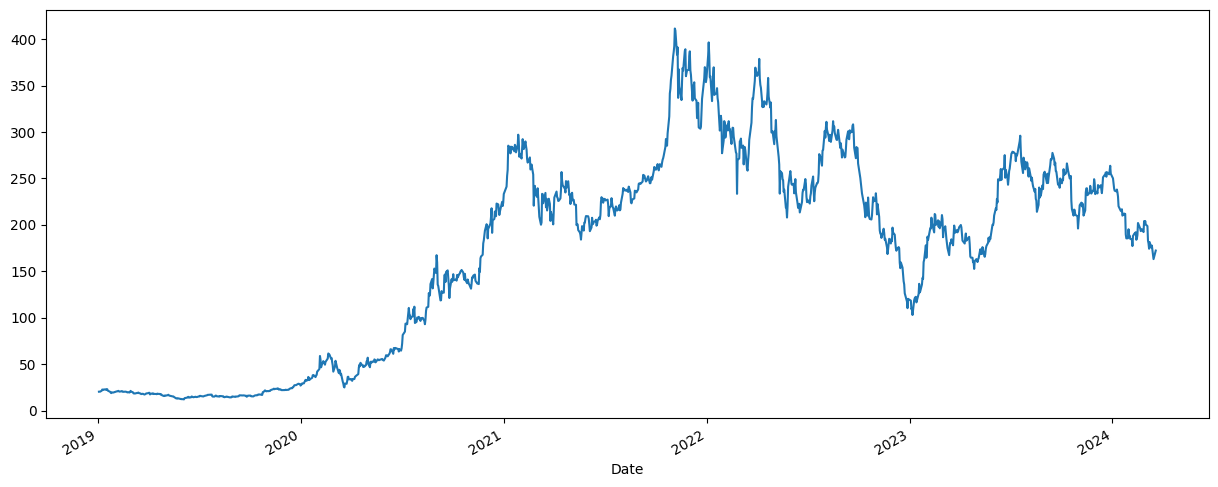

In [ ]:
df.Open.plot(figsize=(15,6))

In [ ]:
df['Open:10 days rolling'] = df.Open.rolling(window = 10, min_periods=1).mean()

<ipython-input-7-e369c33a3532>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open:10 days rolling'] = df.Open.rolling(window = 10, min_periods=1).mean()


<Axes: xlabel='Date'>

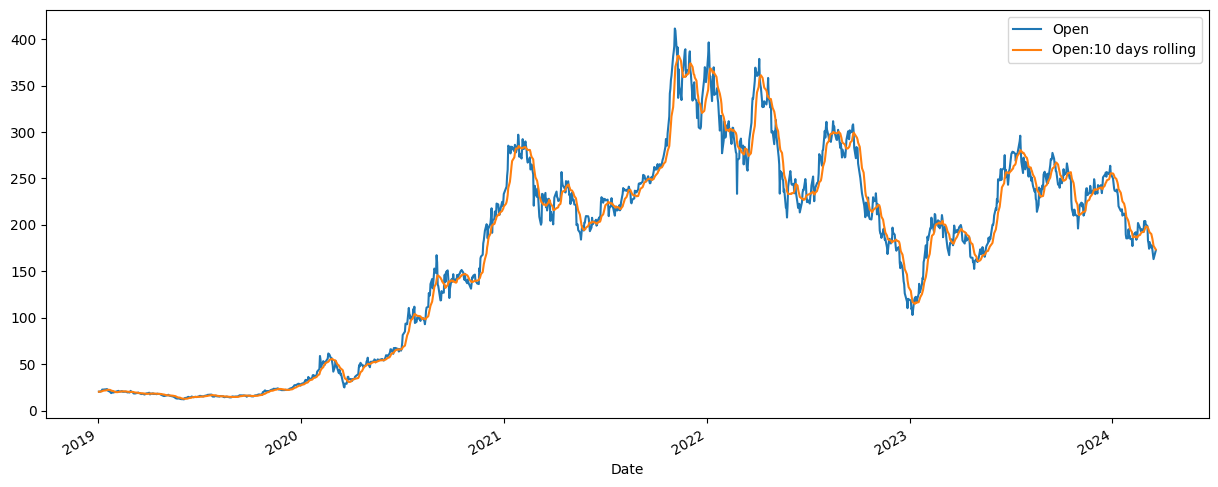

In [ ]:
df[['Open','Open:10 days rolling']].plot(figsize=(15,6))

In [ ]:
df['Open:50 days rolling'] = df.Open.rolling(window = 50, min_periods=1).mean()
df['Open:100 days rolling'] = df.Open.rolling(window = 100, min_periods=1).mean()
df['Open:550 days rolling'] = df.Open.rolling(window = 550, min_periods=1).mean()

<ipython-input-9-669f0cd4419a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open:50 days rolling'] = df.Open.rolling(window = 50, min_periods=1).mean()
<ipython-input-9-669f0cd4419a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open:100 days rolling'] = df.Open.rolling(window = 100, min_periods=1).mean()
<ipython-input-9-669f0cd4419a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

<Axes: xlabel='Date'>

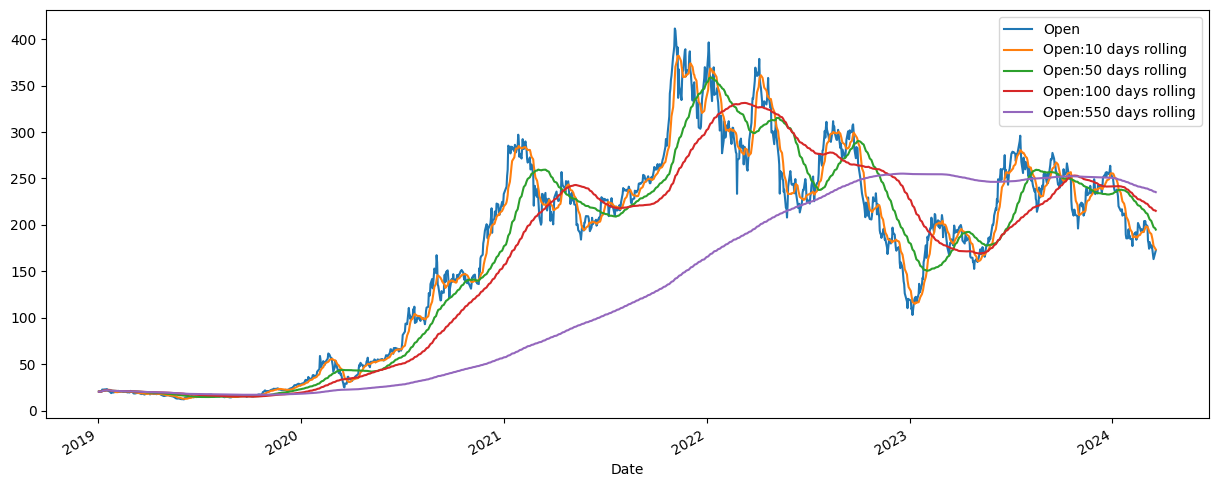

In [ ]:
df[['Open','Open:10 days rolling','Open:50 days rolling','Open:100 days rolling','Open:550 days rolling']].plot(figsize=(15,6))

# Cummulative Moving Average

In [ ]:
#Expanding
df = df_tesla['2019':'2024']
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,20.406668,21.008667,19.920000,20.674667,20.674667,174879000
2019-01-03,20.466667,20.626667,19.825333,20.024000,20.024000,104478000
2019-01-04,20.400000,21.200001,20.181999,21.179333,21.179333,110911500
2019-01-07,21.448000,22.449333,21.183332,22.330667,22.330667,113268000
2019-01-08,22.797333,22.934000,21.801332,22.356667,22.356667,105127500


In [ ]:
df['Open: expanding'] = df.Open.expanding().mean()

<ipython-input-12-2250db8583b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open: expanding'] = df.Open.expanding().mean()


<Axes: xlabel='Date'>

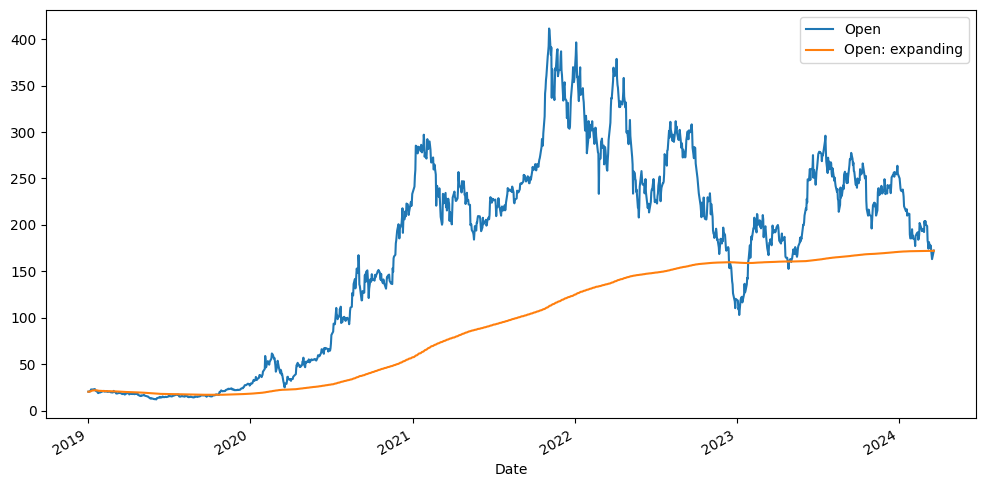

In [ ]:
df[['Open', 'Open: expanding']].plot(figsize=(12,6))

# Exponential Moving Average

In [ ]:
df = df_tesla['2019':'2024']
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,20.406668,21.008667,19.920000,20.674667,20.674667,174879000
2019-01-03,20.466667,20.626667,19.825333,20.024000,20.024000,104478000
2019-01-04,20.400000,21.200001,20.181999,21.179333,21.179333,110911500
2019-01-07,21.448000,22.449333,21.183332,22.330667,22.330667,113268000
2019-01-08,22.797333,22.934000,21.801332,22.356667,22.356667,105127500


In [ ]:
# Smoothing Factor = 0.1
df['EMA_0.1'] = df.Open.ewm(alpha=0.1, adjust=False).mean()

<ipython-input-33-d3b5b37d880f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EMA_0.1'] = df.Open.ewm(alpha=0.1, adjust=False).mean()


In [ ]:
df['EMA_0.001'] = df.Open.ewm(alpha=0.001, adjust=False).mean()

<ipython-input-34-263da0eba0c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EMA_0.001'] = df.Open.ewm(alpha=0.001, adjust=False).mean()


<Axes: xlabel='Date'>

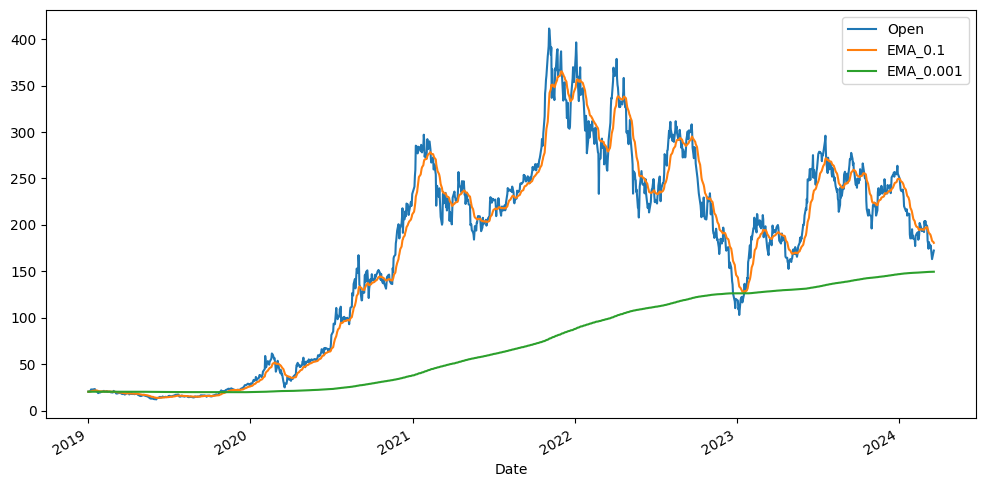

In [ ]:
df[['Open', 'EMA_0.1', 'EMA_0.001']].plot(figsize=(12,6))

In [ ]:
df['EMA: 5 days'] = df.Open.ewm(span=5).mean()

<ipython-input-36-1b9de553a79a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EMA: 5 days'] = df.Open.ewm(span=5).mean()


<Axes: xlabel='Date'>

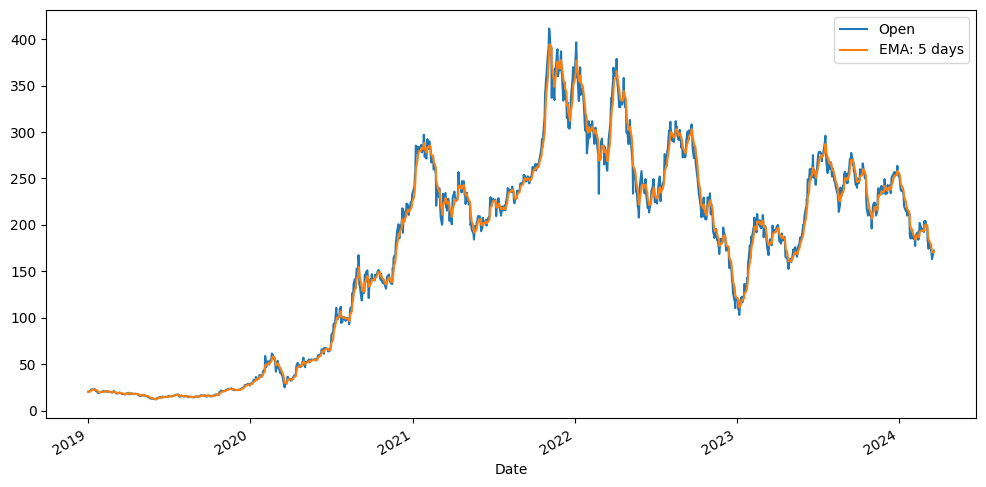

In [ ]:
df[['Open', 'EMA: 5 days']].plot(figsize=(12,6))

In [ ]:
df['EMA: 50 days'] = df.Open.ewm(span=50).mean()
df['EMA: 500 days'] = df.Open.ewm(span=500).mean()

<ipython-input-38-44840bf1038a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EMA: 50 days'] = df.Open.ewm(span=50).mean()
<ipython-input-38-44840bf1038a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EMA: 500 days'] = df.Open.ewm(span=500).mean()


<Axes: xlabel='Date'>

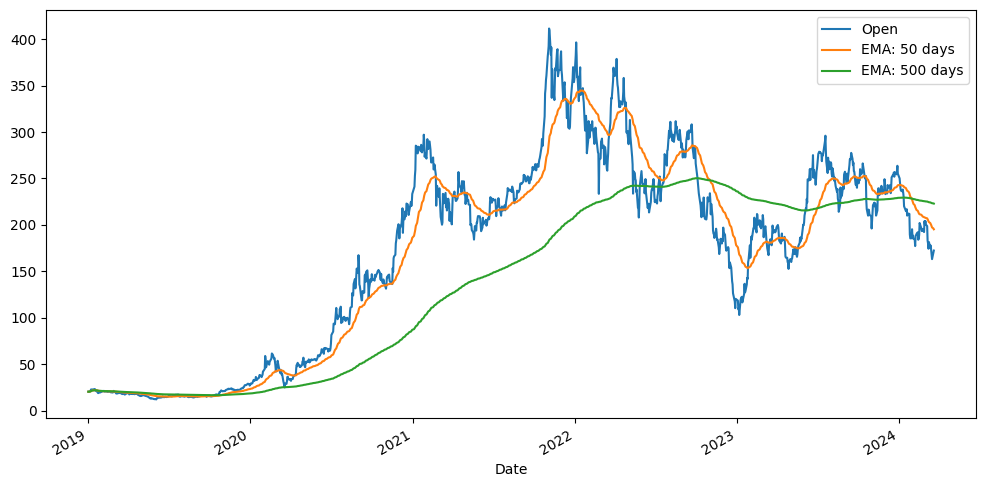

In [ ]:
df[['Open', 'EMA: 50 days', 'EMA: 500 days']].plot(figsize=(12,6))